In [1]:
# Test migration history reconstruction on breast cancer data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'src/data/msk_met/msk_met_freq_one_met_patients.csv')
                          
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [8]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = data_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
#     weights = vertex_labeling.Weights(data_fit=0.1, mig=10.0, comig=5.0, seed_site=1.0, reg=0.8, gen_dist=0.0)

#     vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
#                                                 weights=weights, p=r, node_idx_to_label=idx_to_label, 
#                                                 max_iter=150, batch_size=64,
#                                                 custom_colors=custom_colors, primary="breast", show_top_trees=False)
    
    O = data_util.get_organotropism_matrix(unique_sites, HOAD_MSK_MET_MAP, MSK_MET_FN)
    print("O", O)
    weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0, organotrop=0.5)
    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                O=O, weights=weights, p=r, node_idx_to_label=idx_to_label,
                                                batch_size=32, init_temp=30, final_temp=0.01,
                                                custom_colors=custom_colors, primary="breast", show_top_trees=True, 
                                                visualize_intermediates=False, verbose=True)


        

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3571e-02],
        [-1.0000e+00, -1.0000e+00,  8.4034e-03,  3.6134e-01,  3.3613e-02,
          5.0420e-02],
        [-1.0000e+00,  9.3812e-02,  9.9800e-04,  2.0958e-02,  1.5369e-01,
          1.0379e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e

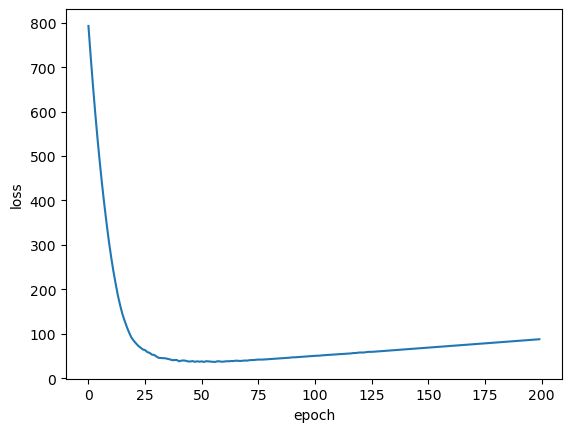

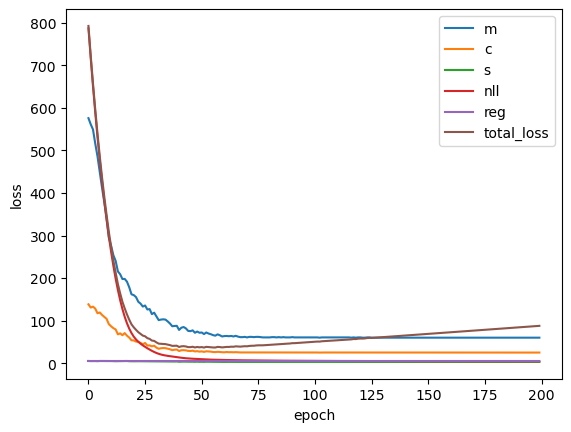

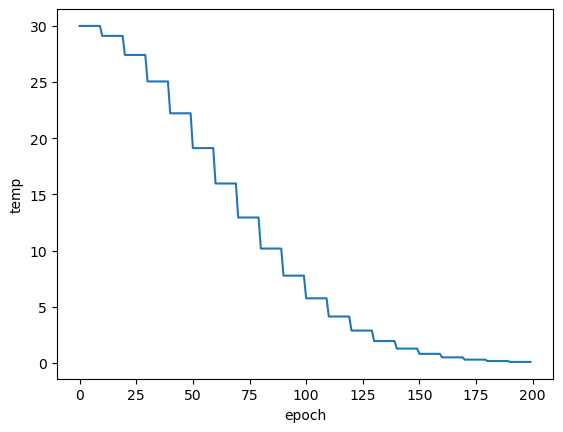

Time elapsed: 10.981874
****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.261
Reg: 5.999999523162842
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,

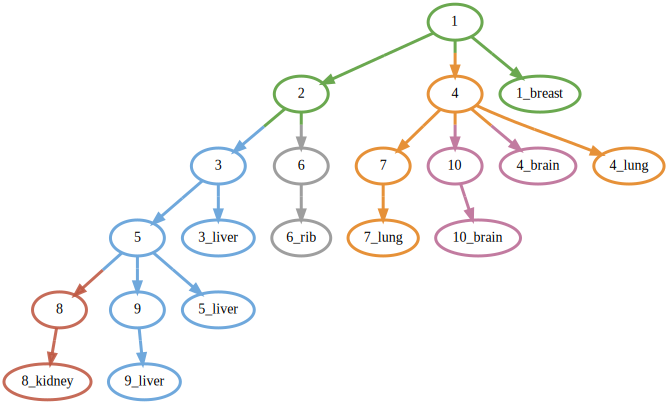

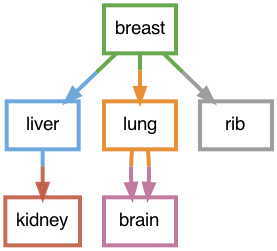

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.316
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3

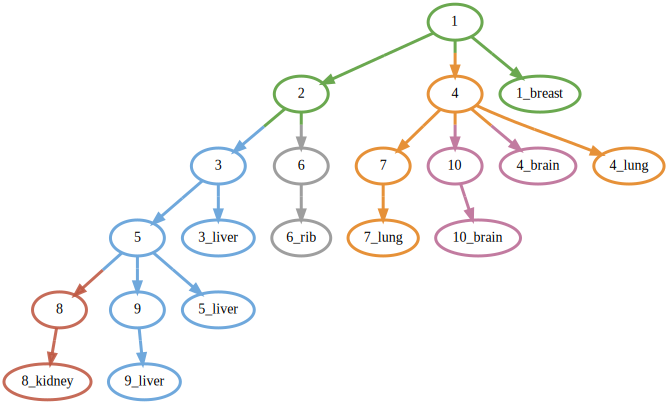

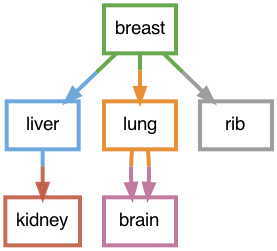

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.322
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

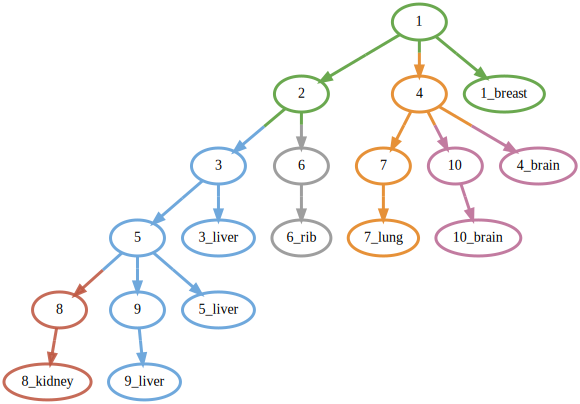

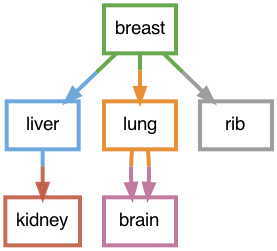

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.351
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

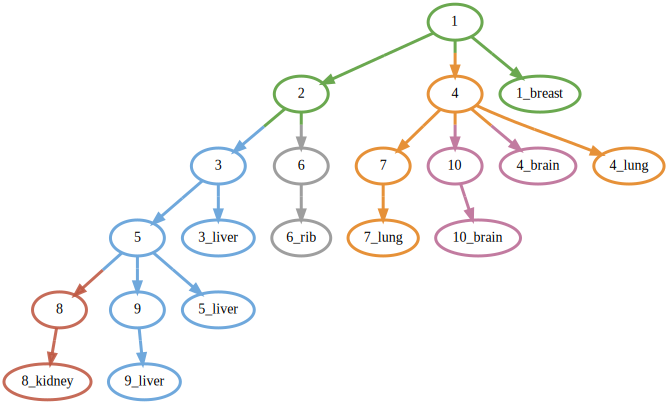

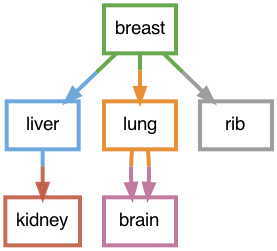

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.37
Reg: 6.000000476837158
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e

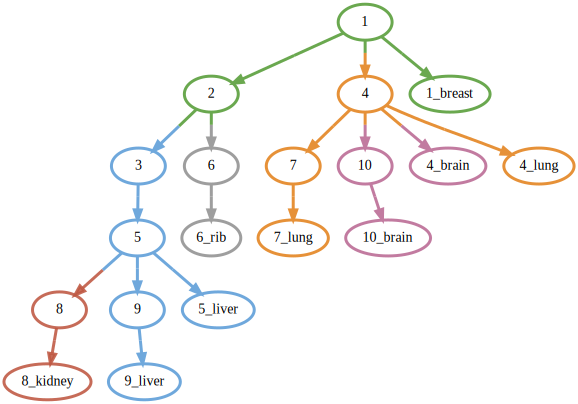

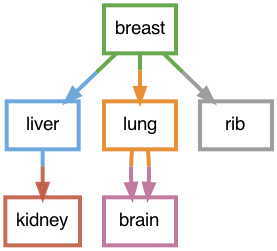

----------------------------------------------------------------------------------------------------



In [9]:
# Patient A7, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,
          5.3571e-02],
        [-1.0000e+00, -1.0000e+00,  8.4034e-03,  3.6134e-01,  3.3613e-02,
          5.0420e-02],
        [-1.0000e+00,  9.3812e-02,  9.9800e-04,  2.0958e-02,  1.5369e-01,
          1.0379e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e

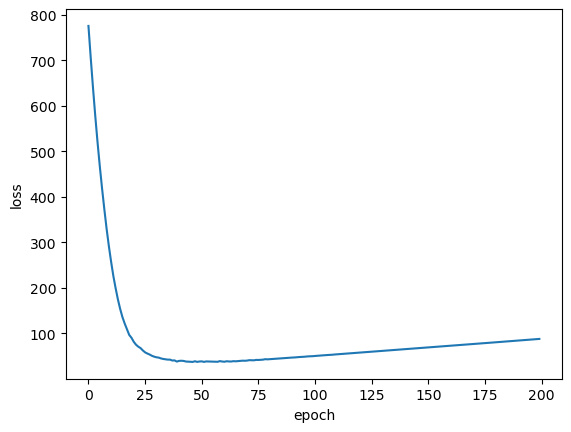

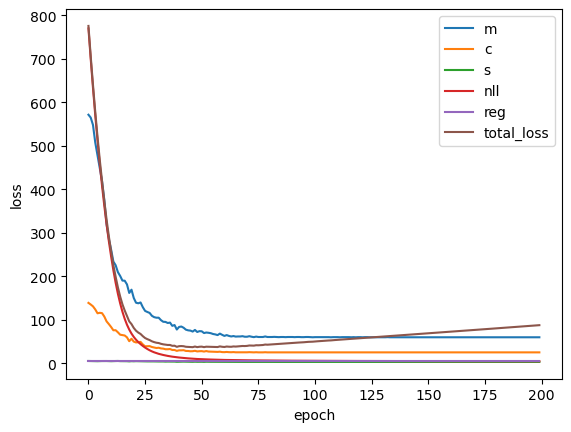

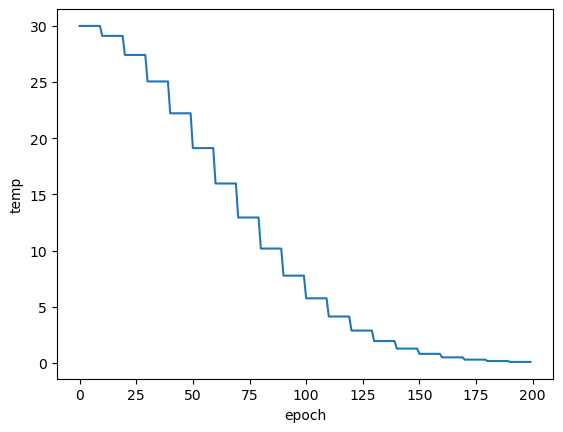

Time elapsed: 11.382428
****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.624
Reg: 6.0
Organotropism penalty: 0.701
site_adj_no_diag
 tensor([[0., 1., 0., 1., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.00

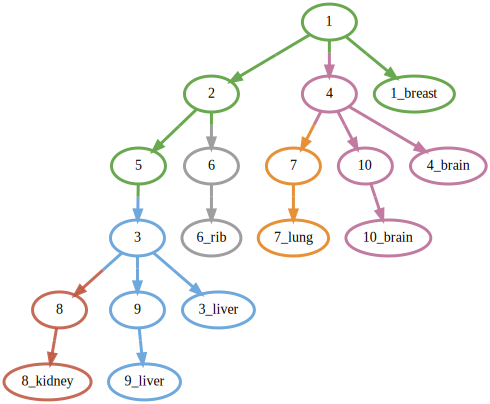

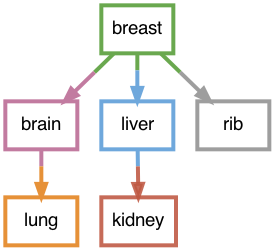

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.43
Reg: 5.999999523162842
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00,  5.3571e-02,  1.7857e-01,


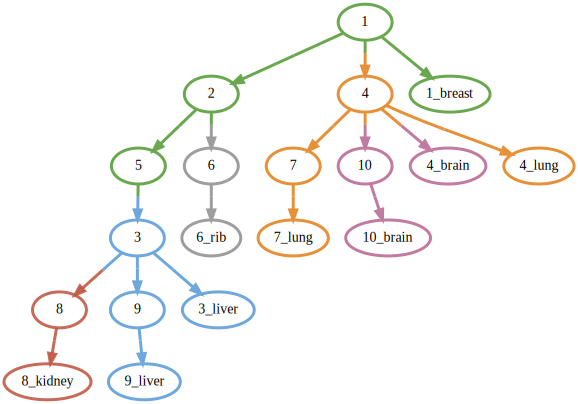

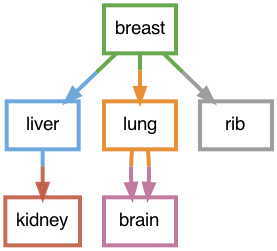

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.445
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

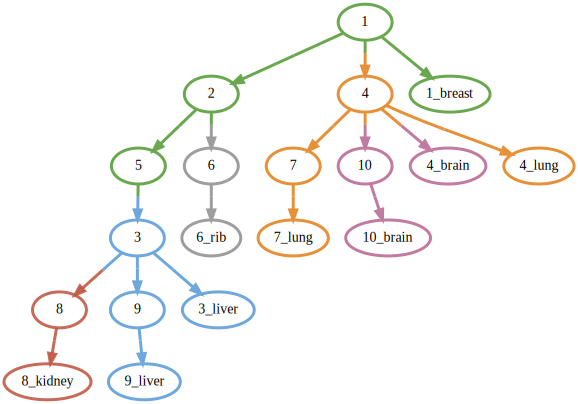

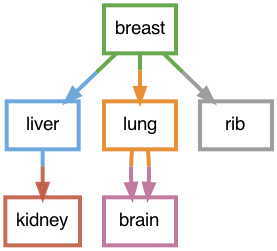

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.445
Reg: 6.000000953674316
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000

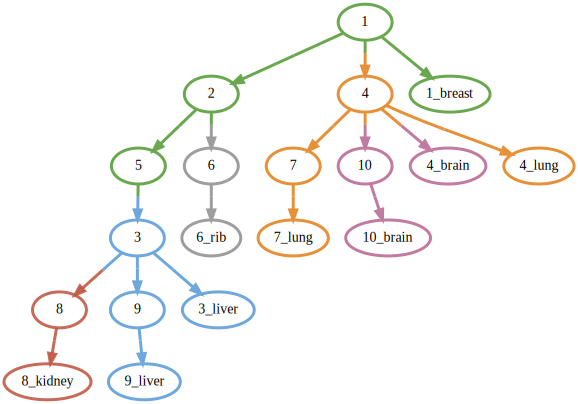

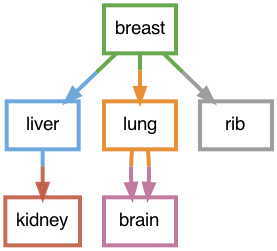

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 4.451
Reg: 6.0
Organotropism penalty: -0.513
site_adj_no_diag
 tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 0.9940, 2.0000, 0.9104, 0.9681, 0.8048],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 2.0000, 2.0000, 0.9464, 0.8214, 0.9464],
        [2.0000, 2.0000, 0.9916, 0.6387, 0.9664, 0.9496],
        [2.0000, 0.9062, 0.9990, 0.9790, 0.8463, 0.8962],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 3.9841e-03,  5.9761e-03, -1.0000e+00,  8.9641e-02,  3.1873e-02,
          1.9522e-01],
        [-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        

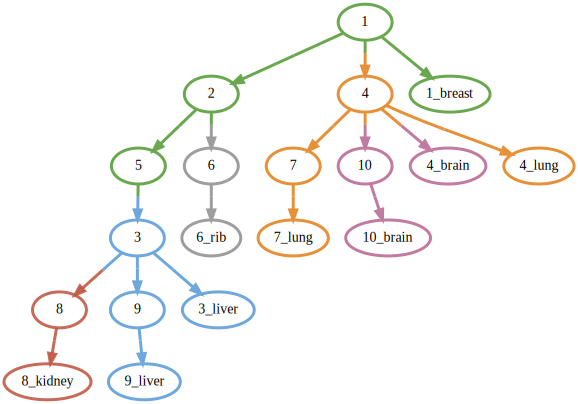

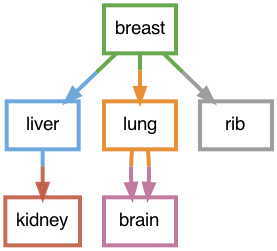

----------------------------------------------------------------------------------------------------



In [10]:
# Patient A7, tree 2 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


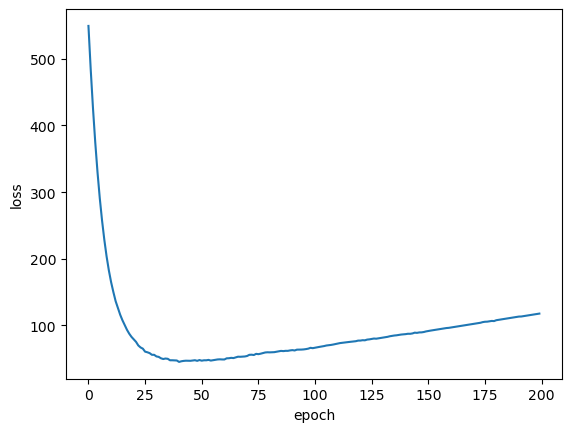

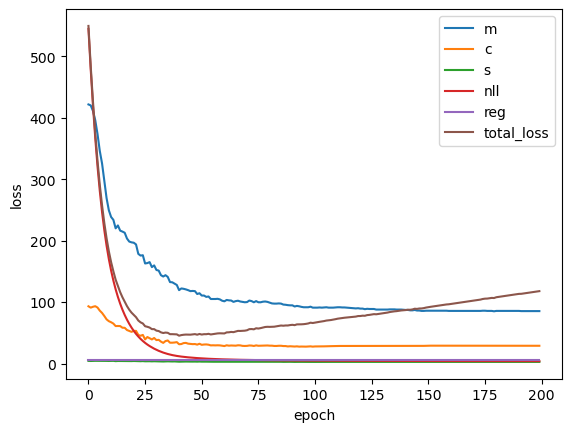

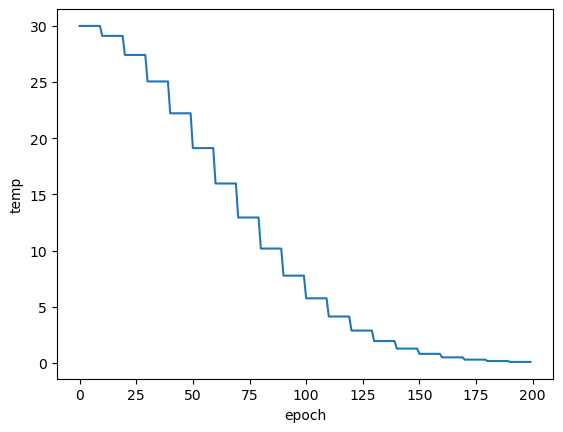

Time elapsed: 9.874701
****************************** BEST TREE ******************************

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 4.084
Reg: 5.000000476837158
Organotropism penalty: 2.93
site_adj_no_diag
 tensor([[0., 1., 0., 2., 1.],
        [0., 0., 2., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  1.0000, -0.0000

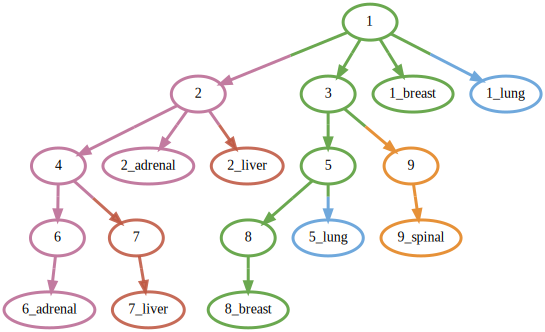

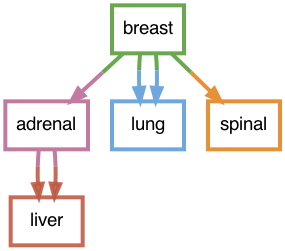

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.866
Reg: 5.0
Organotropism penalty: -0.199
site_adj_no_diag
 tensor([[0., 0., 1., 2., 2.],
        [0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -0.0120],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0336, -0.00

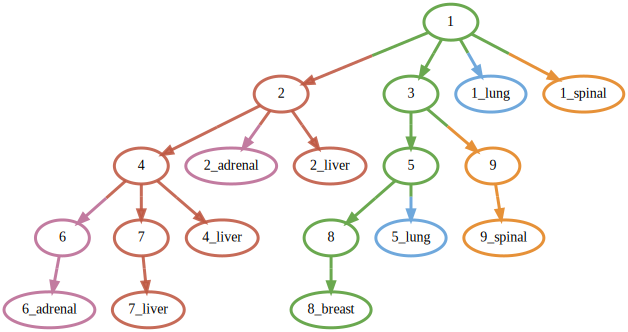

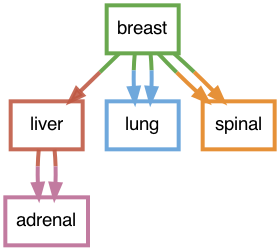

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.796
Reg: 5.0
Organotropism penalty: 0.734
site_adj_no_diag
 tensor([[0., 1., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  1.0000, -0.1793, -0.06

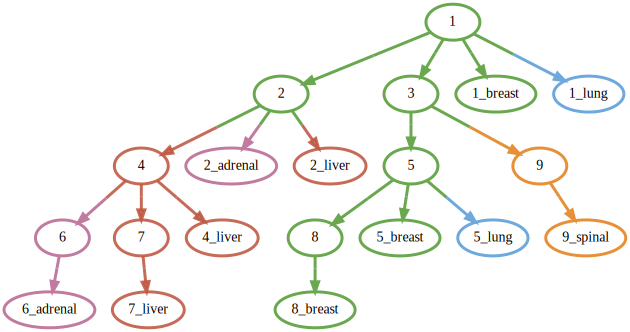

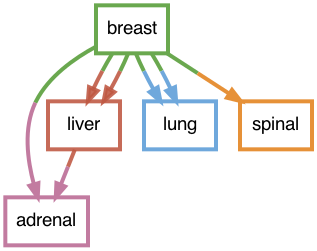

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.907
Reg: 4.999999523162842
Organotropism penalty: 0.734
site_adj_no_diag
 tensor([[0., 1., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  1.0000, 

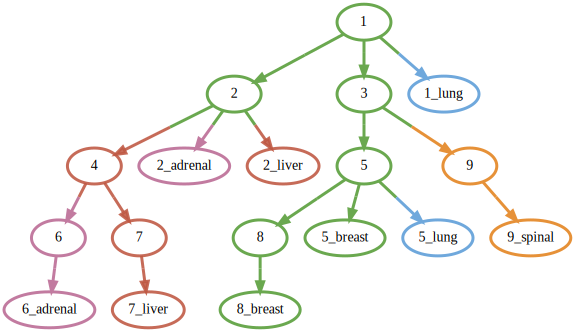

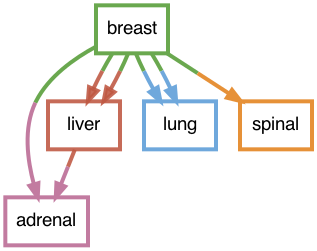

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.89
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.063

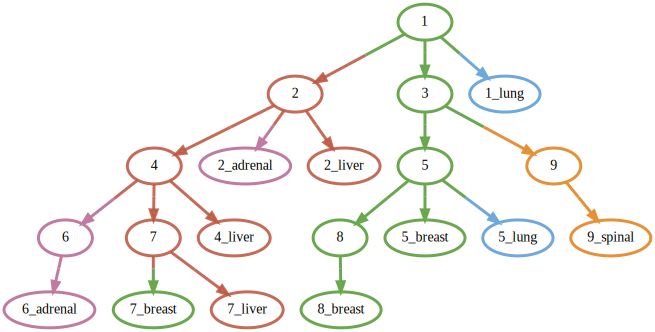

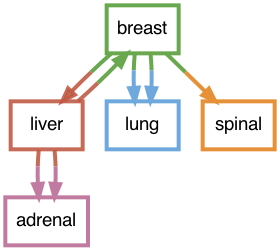

----------------------------------------------------------------------------------------------------



In [11]:
# Patient A1, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


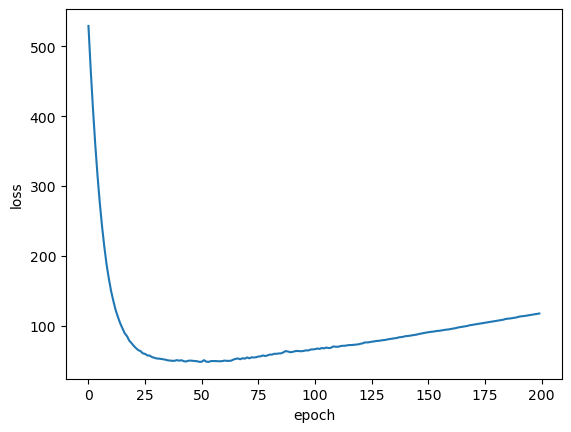

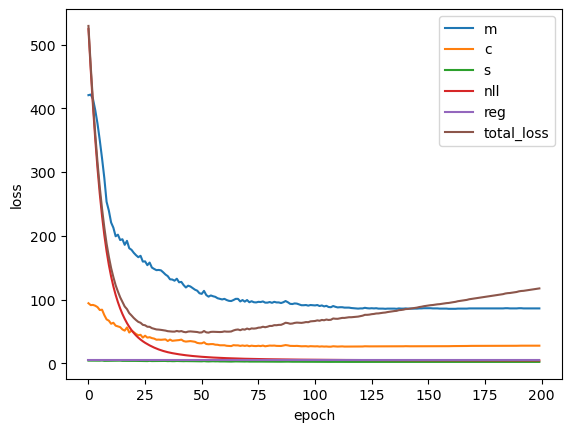

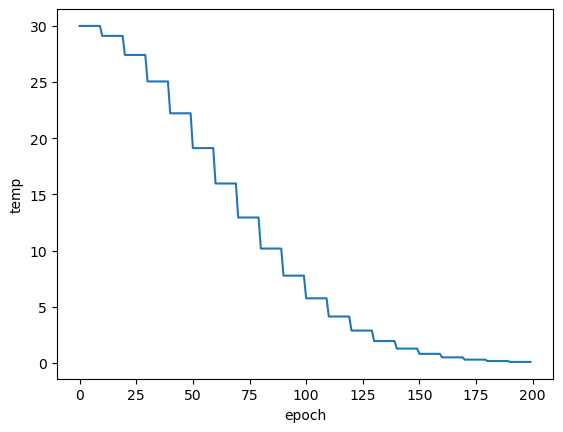

Time elapsed: 9.644678
****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.456
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -0

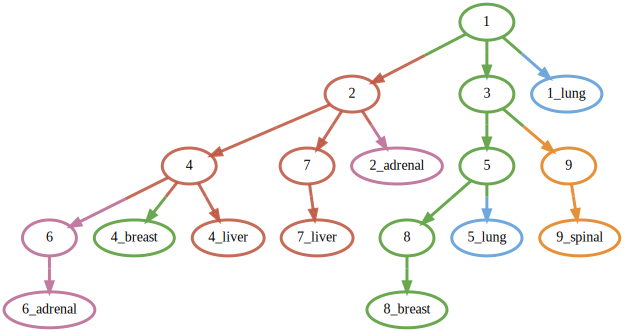

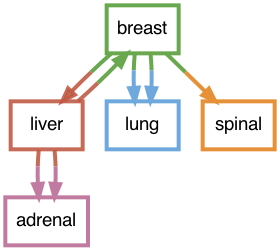

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.374
Reg: 4.999999523162842
Organotropism penalty: 3.93
site_adj_no_diag
 tensor([[0., 1., 0., 2., 1.],
        [1., 0., 2., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  1.0000, -0.0000, -0.0637, -0.0060],
        [ 1.0000,  0.0000,  2.0000,  0.0000,  0.0000],
        [ 0.0000, -0

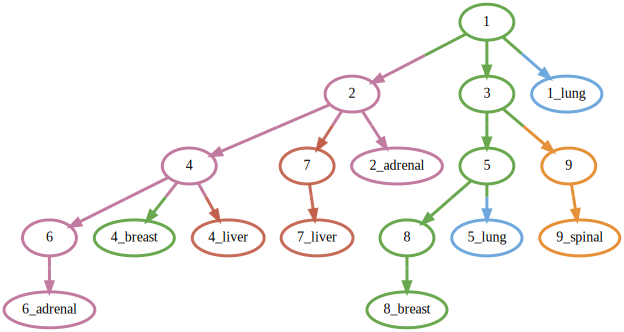

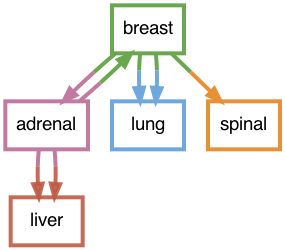

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.554
Reg: 5.0
Organotropism penalty: 3.93
site_adj_no_diag
 tensor([[0., 1., 0., 2., 1.],
        [1., 0., 2., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  1.0000, -0.0000, -0.063

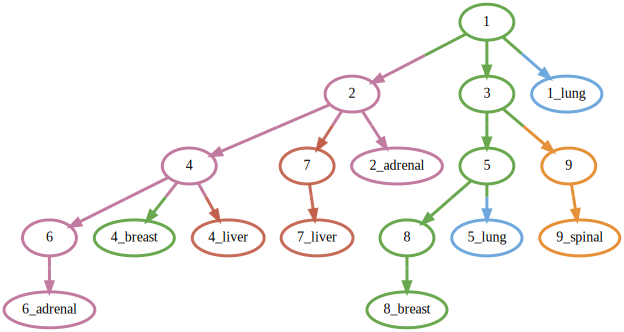

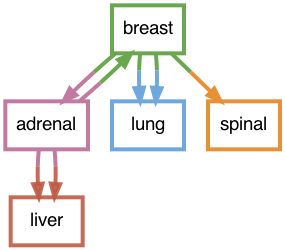

----------------------------------------------------------------------------------------------------

Migration number: 8.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.439
Reg: 5.0
Organotropism penalty: 0.79
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 3., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.063

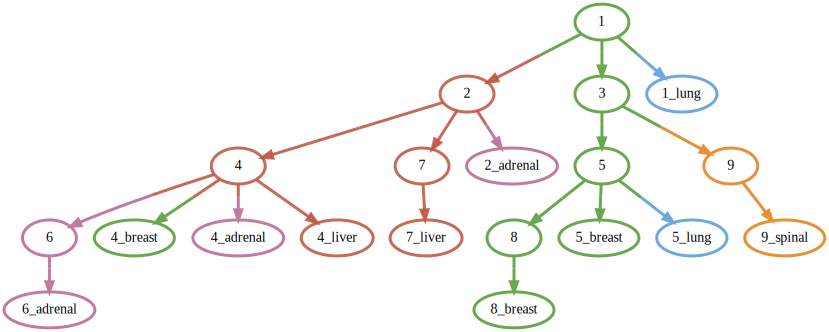

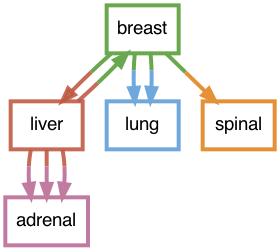

----------------------------------------------------------------------------------------------------

Migration number: 8.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.442
Reg: 5.0
Organotropism penalty: 0.79
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 3., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.063

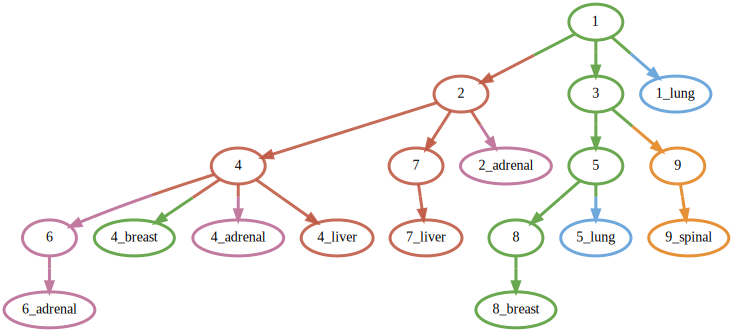

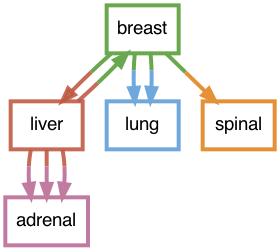

----------------------------------------------------------------------------------------------------



In [12]:
# Patient A1, tree 2 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
O tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])


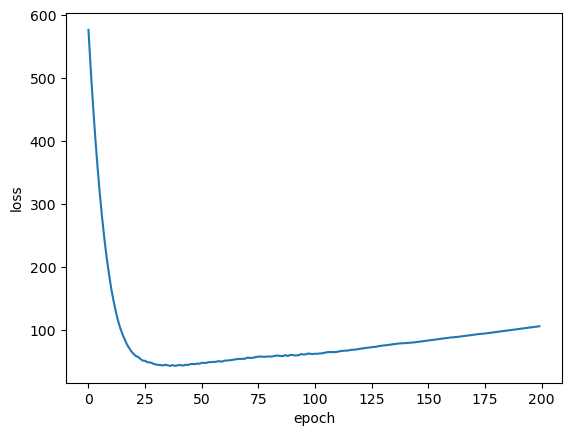

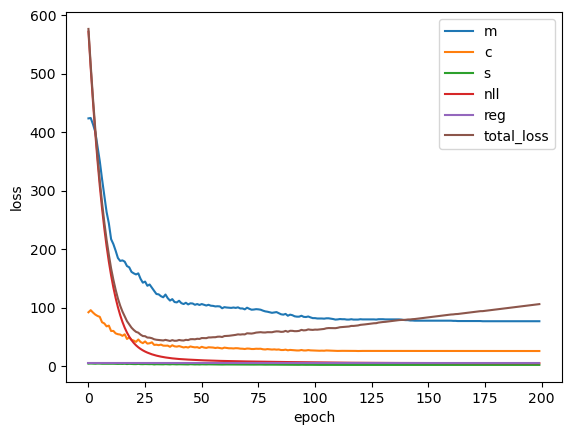

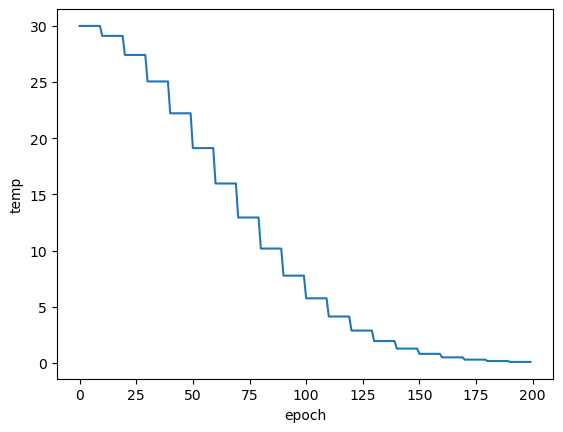

Time elapsed: 9.855139
****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 5.166
Reg: 5.000000476837158
Organotropism penalty: 1.751
site_adj_no_diag
 tensor([[0., 2., 2., 2., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  2.0000, -0.179

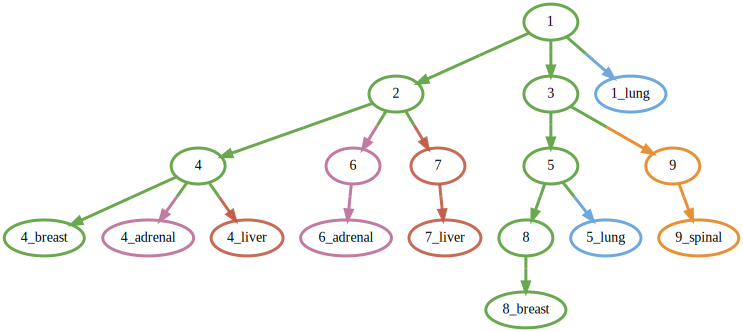

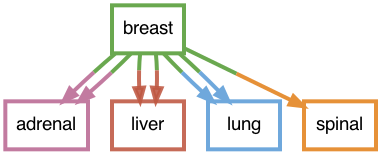

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.871
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.0637, -0.0060],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.0000, -0.0336, -0.000

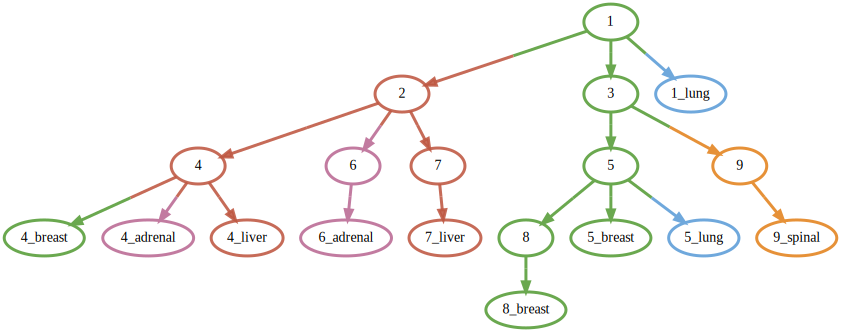

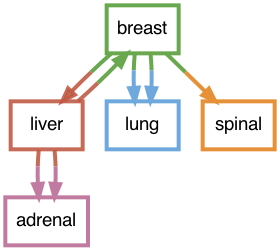

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 5.002
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

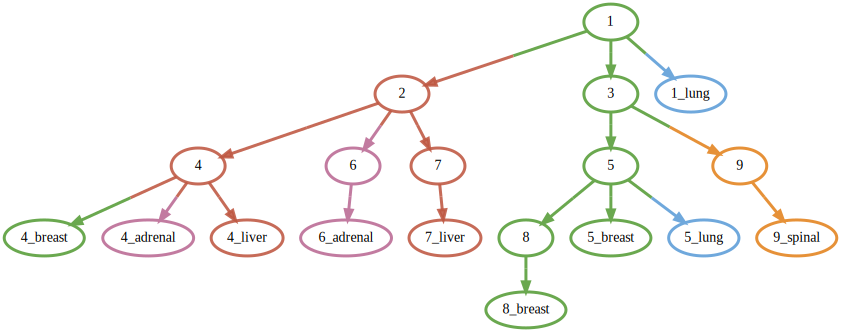

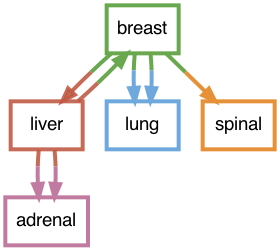

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 5.003
Reg: 4.999999523162842
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, 

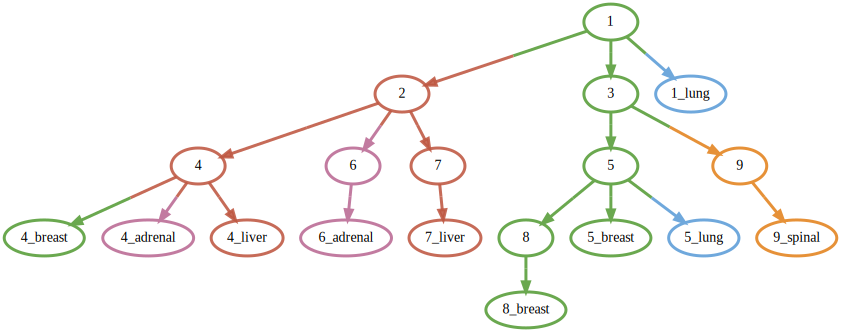

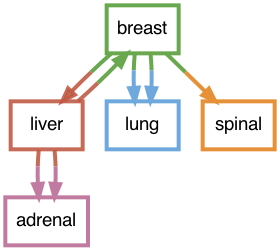

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 5.049
Reg: 5.0
Organotropism penalty: 0.807
site_adj_no_diag
 tensor([[0., 0., 1., 2., 1.],
        [0., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
(1 - O) tensor([[0.9960, 2.0000, 0.9104, 0.9681, 0.9940],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000],
        [2.0000, 0.9832, 0.6387, 0.9664, 2.0000],
        [2.0000, 0.9850, 0.9790, 0.8463, 0.9062],
        [2.0000, 2.0000, 2.0000, 2.0000, 2.0000]])
O
 tensor([[ 0.0040, -1.0000,  0.0896,  0.0319,  0.0060],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000,  0.0168,  0.3613,  0.0336, -1.0000],
        [-1.0000,  0.0150,  0.0210,  0.1537,  0.0938],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000]])
organ_penalty
 tensor([[-0.0000,  0.0000, -0.0896, -0.06

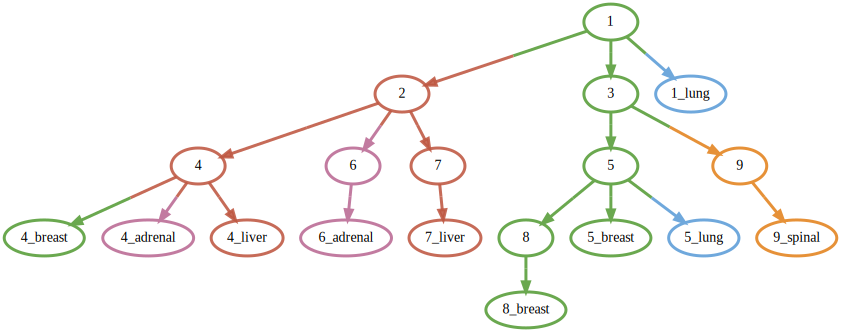

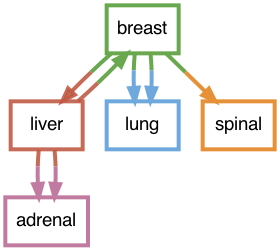

----------------------------------------------------------------------------------------------------



In [13]:
### Patient A1, tree 3 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.3.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)
